In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install split-folders[full]

In [ ]:
import splitfolders
input_folder='/content/drive/MyDrive/Alzheimer'
splitfolders.ratio(input_folder, output="alzi_df",
    seed=42, ratio=(.9,0,.1), group_prefix=None, move=False) # default values

Copying files: 474 files [00:40, 11.63 files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D,Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
train_datasets = "/content/alzi_df/train"
validation_datasets = "/content/alzi_df/test"

In [ ]:
batch_size = 64
image_size =[ 224,224]

In [ ]:

train_datasets_generator = ImageDataGenerator(rescale=1./255,
                                                  shear_range = 0.2,
                                                  zoom_range = 0.2,
                                                  horizontal_flip = True,
                                                  vertical_flip=True,
                                                  brightness_range=[0.1, 1.5],
                                                  fill_mode = "nearest")


validation_datasets_generator = ImageDataGenerator(rescale=1./255,
                                                  shear_range = 0.2,
                                                  zoom_range = 0.2,
                                                  horizontal_flip = True,
                                                  vertical_flip=True,
                                                  brightness_range=[0.1, 1.5],
                                                  fill_mode = "nearest")

In [ ]:

train_datasets_generator_data = train_datasets_generator.flow_from_directory("/content/alzi_df/train",
        batch_size = batch_size,

        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )

validation_datasets_generator_data = validation_datasets_generator.flow_from_directory("/content/alzi_df/test",
        batch_size = batch_size,

        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )

Found 425 images belonging to 3 classes.
Found 49 images belonging to 3 classes.


In [ ]:
train_data , validation_data = prepare_the_datasets(train_datasets_generator_data, validation_datasets_generator_data,batch_size = 64 ,image_size =[224,224])

TypeError: ignored

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers

In [ ]:
cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224, 3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (128, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),
cnn.add(layers.Flatten()),

cnn.add(layers.Dense(512,activation='relu'))
#output layer
cnn.add(layers.Dense(3,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
from tensorflow import keras

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 20,
                   verbose = 1,
                   restore_best_weights = True)

In [ ]:
import tensorflow as tf

In [ ]:
history = cnn.fit(train_datasets_generator_data ,
                    steps_per_epoch = len(train_datasets_generator_data),
                    epochs = 1,
                    validation_data = validation_datasets_generator_data,
                    validation_steps = len(validation_datasets_generator_data),
                    callbacks = [es]
                    )

TypeError: ignored

In [ ]:
# 3d plot
from mpl_toolkits.mplot3d import Axes3D


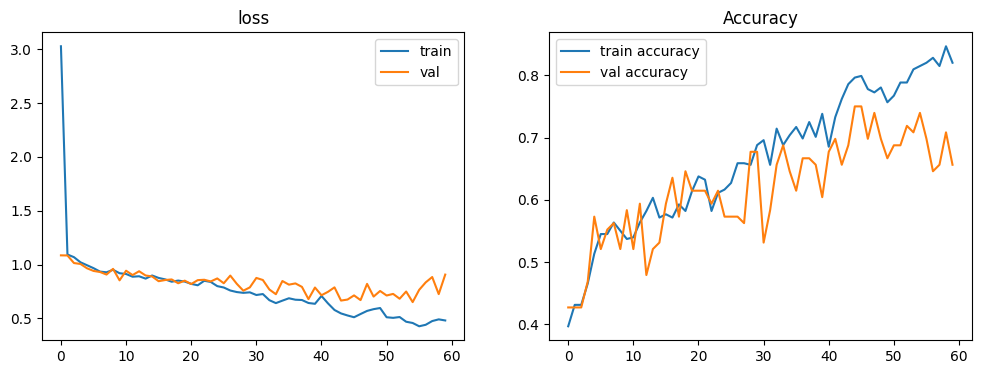

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(-0.1, 0.1)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.9, 1.1)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="");

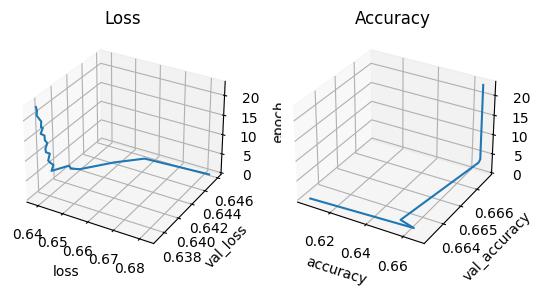

In [ ]:
def plot_history_3d(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        from mpl_toolkits.mplot3d import Axes3D
        import matplotlib.pyplot as plt
        import numpy as np
        fig = plt.figure()
        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Plot the loss
    ax1.plot3D(loss, val_loss, range(len(loss)))
    ax1.set_xlabel('loss')
    ax1.set_ylabel('val_loss')
    ax1.set_zlabel('epoch')
    ax1.set_title('Loss')

    # Plot the accuracy
    ax2.plot3D(accuracy, val_accuracy, range(len(accuracy)))
    ax2.set_xlabel('accuracy')
    ax2.set_ylabel('val_accuracy')
    ax2.set_zlabel('epoch')
    ax2.set_title('Accuracy')

    plt.show()

plot_history_3d(history, title='', axs=None, exp_name="");

ResNet50V2

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout


In [ ]:
input_shape = (image_size, image_size, 3)
# Load the pre-trained model.
base_model = ResNet50V2(weights = 'imagenet',
                        input_shape = input_shape,
                        include_top = False)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ["accuracy"])

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
history = model.fit(train_data,
                    validation_data = validation_data,
                    validation_steps = len(validation_data),
                    steps_per_epoch = len(train_data),
                    epochs = 50,
                    callbacks = [es])

Epoch 1/50
6/6 [==============================] - 104s 15s/step - loss: 0.7462 - accuracy: 0.5838 - val_loss: 0.6927 - val_accuracy: 0.6667
Epoch 2/50
6/6 [==============================] - 84s 15s/step - loss: 0.6835 - accuracy: 0.6437 - val_loss: 0.6628 - val_accuracy: 0.6215
Epoch 3/50
6/6 [==============================] - 84s 15s/step - loss: 0.6538 - accuracy: 0.6402 - val_loss: 0.6469 - val_accuracy: 0.6667
Epoch 4/50
6/6 [==============================] - 89s 15s/step - loss: 0.6508 - accuracy: 0.6640 - val_loss: 0.6420 - val_accuracy: 0.6667
Epoch 5/50
6/6 [==============================] - 85s 14s/step - loss: 0.6446 - accuracy: 0.6631 - val_loss: 0.6417 - val_accuracy: 0.6667
Epoch 6/50
6/6 [==============================] - 79s 13s/step - loss: 0.6425 - accuracy: 0.6658 - val_loss: 0.6384 - val_accuracy: 0.6667
Epoch 7/50
6/6 [==============================] - 85s 14s/step - loss: 0.6414 - accuracy: 0.6667 - val_loss: 0.6381 - val_accuracy: 0.6667
Epoch 8/50
6/6 [==========

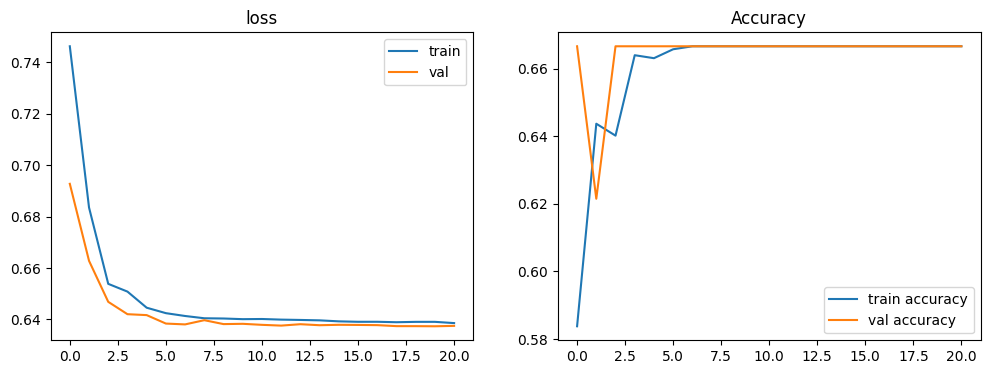

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(-0.1, 0.1)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.9, 1.1)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="");

VGG

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
    ])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 28, 28, 128)      

In [ ]:
## Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2_fit = model2.fit(train_data,
                    validation_data = validation_data,
                    validation_steps = len(validation_data),
                    steps_per_epoch = len(train_data),
                    epochs = 50,
                    callbacks = [es])

Epoch 1/50
6/6 [==============================] - 68s 11s/step - loss: 0.9226 - accuracy: 0.5847 - val_loss: 0.9535 - val_accuracy: 0.5312
Epoch 2/50
6/6 [==============================] - 68s 11s/step - loss: 0.9252 - accuracy: 0.5291 - val_loss: 0.9171 - val_accuracy: 0.5521
Epoch 3/50
6/6 [==============================] - 72s 12s/step - loss: 0.9139 - accuracy: 0.5529 - val_loss: 0.8959 - val_accuracy: 0.4896
Epoch 4/50
6/6 [==============================] - 70s 12s/step - loss: 0.9247 - accuracy: 0.5397 - val_loss: 0.9004 - val_accuracy: 0.5312
Epoch 5/50
6/6 [==============================] - 68s 11s/step - loss: 0.9032 - accuracy: 0.5688 - val_loss: 0.8827 - val_accuracy: 0.5521
Epoch 6/50
6/6 [==============================] - 73s 12s/step - loss: 0.8866 - accuracy: 0.5529 - val_loss: 0.8839 - val_accuracy: 0.5729
Epoch 7/50
6/6 [==============================] - 73s 12s/step - loss: 0.8967 - accuracy: 0.5503 - val_loss: 0.8611 - val_accuracy: 0.5938
Epoch 8/50
6/6 [===========

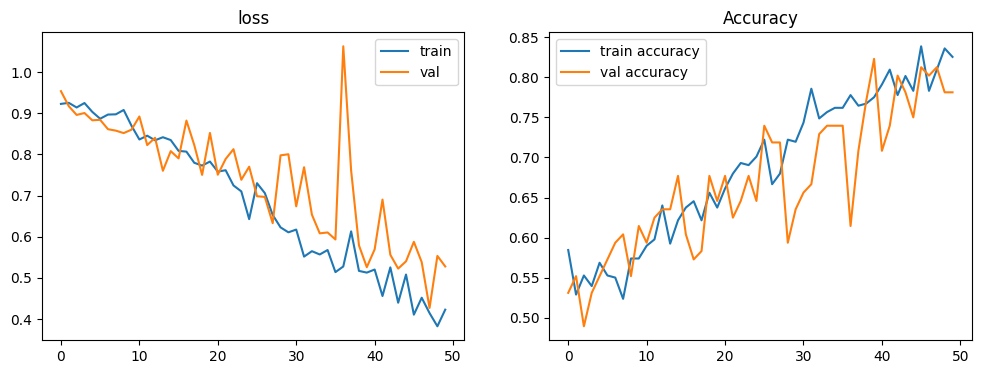

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(-0.1, 0.1)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.9, 1.1)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(model2_fit, title='', axs=None, exp_name="");